In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install picklable_itertools

!pip install fuel
!pip install foolbox

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
  Running setup.py bdist_wheel for picklable-itertools ... - done
  Stored in directory: /root/.cache/pip/wheels/36/dd/e2/ec30ef7c475e1d9fb966735984ba05f8710c67d7de5358c326
Successfully built picklable-itertools
    100% |████████████████████████████████| 194kB 3.8MB/s 
    100% |████████████████████████████████| 3.8MB 10.6MB/s 
    100% |████████████████████████████████| 163kB 28.6MB/s 
  Running setup.py bdist_wheel for fuel ... - \ | done
  Stored i

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
PROJECT_DIR = "/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/"
import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)


##** GTSRB Experiments **##

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/gtsrb/RCAE/
INFO: The dataset is  gtsrb
[INFO:] Loading data...
The random seed used in the experiment is  42
[INFO:] Loading adversarial data...
[INFO:] Negative Y_test labels 100
[INFO:] Positive Y_test labels 270
Data loaded.
[INFO:] Assertions of memory muted
[INFO:] Loading data...
The random seed used in the experiment is  42
[INFO:] Loading adversarial data...
[INFO:] Negative Y_test labels 100
[INFO:] Positive Y_test labels 270
Data loaded.
Train Data Shape:  (780, 3, 32, 32)
Train Label Shape:  (780,)
Validation Data Shape:  (0, 3, 32, 32)
Validation Label Shape:  (0,)
Test Data Shape:  (370, 3, 32, 32)
Test Label Shape:  (370,)
===========TRAINING AND PREDICTING WITH DCAE============================
[INFO:] X_train.shape (1150, 32, 32, 3)
[INFO:] y_train.shape (1150,)
[INFO:] X_test.shape (1150, 32, 32, 3)
[INFO:] y_test.shape (1150,)
[INFO] compiling model...
[INFO:]

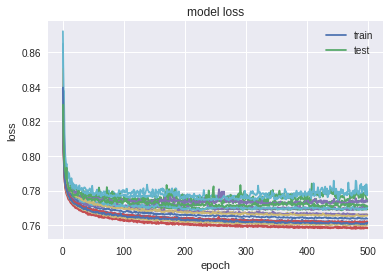

In [3]:

## Obtaining the training and testing data
%reload_ext autoreload
%autoreload 2
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "gtsrb"
IMG_DIM= 3072
IMG_HGT =32
IMG_WDT=32
IMG_CHANNEL=3
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/gtsrb/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/gtsrb/RCAE/"

PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
# RANDOM_SEED = [42]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

##** End of GTSRB experiments **##